# Pandas exercise（30个）



#### 作业提交方式
在线提交，每位同学请在本notebook文件命名前加自己的学号-姓名 。只需提交notebook文件，数据文件不用提交。如果由于未正确遵循这些指示而无法访问您的作业，则不会对您的作业进行评分。

---

In [2]:
import pandas as pd

### Step 1.从目录下加载数据文件chipotle.tsv. 导入数据集，读取数据并存为一个名叫chipo的数据框，显示前六行数据

In [3]:
#your code

chipo = pd.read_csv('chipotle.tsv', sep='\t')
chipo.head(6)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98


### Step2.显示出全部的列名称,并显示数据集的索引

In [4]:
#全部的列名称
#your code 
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [5]:
#数据集的索引
#your code
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step3. 订单数最多的商品是什么？（查看前五行）

In [6]:
#your code
chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(5)

C:\Users\86199\AppData\Local\Temp\ipykernel_80696\2549640050.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(5)


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


### Step4.从choice_description列观察订单最多的项目是?（查看前五行）

In [7]:
#your code
chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(5)

C:\Users\86199\AppData\Local\Temp\ipykernel_80696\3425683197.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False).head(5)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


### Step5.在该数据集对应的时期内，一共有多少订单？

In [8]:
#your code
chipo.order_id.value_counts().count()

1834

### Step6.将 item price转成float类型 设字段名为price

In [10]:
#your code
chipo['price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.head(5)


,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


### Step7.在该数据集对应的时期内，收入(revenue)是多少？
新增sub_price列用于计算revenue sub_price = quantity * price

In [11]:
#your code
chipo['sub_price'] = chipo['quantity'] * chipo['price']
chipo['sub_price'].sum()

39237.02

### Step8.每一单(order)对应的平均总价是多少？

In [12]:
#your code
chipo.groupby('order_id').sum().mean()['sub_price']


C:\Users\86199\AppData\Local\Temp\ipykernel_80696\3779199789.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo.groupby('order_id').sum().mean()['sub_price']


21.39423118865867

### Step9.一共有多少种不同的商品被售出？

In [13]:
#your code
chipo['item_name'].value_counts().count()

50

### Step10.只选取item_name这一列

In [14]:
#your code
chipo['item_name']

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

### Step11.该数据集中一共有多少列(columns)

In [15]:
#your code
# ???想干嘛,不是count()吗
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   object 
 5   price               4622 non-null   float64
 6   sub_price           4622 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 252.9+ KB


### Step12.将数据集中的列 quantity, item_name,和price单独存为一个名叫item的数据框，查看前五行数据

In [16]:
#your code
item = chipo[['quantity', 'item_name', 'price']]
item.head(5)


,quantity,item_name,price
0,1,Chips and Fresh Tomato Salsa,2.39
1,1,Izze,3.39
2,1,Nantucket Nectar,3.39
3,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,Chicken Bowl,16.98


### Step13.对数据框item按照先price再item_name进行排序（查看前五行）

In [17]:
#your code
item.sort_values(['price', 'item_name']).head(5)

,quantity,item_name,price
34,1,Bottled Water,1.09
87,1,Bottled Water,1.09
318,1,Bottled Water,1.09
701,1,Bottled Water,1.09
780,1,Bottled Water,1.09


### Step14.找到进球数price超过25的球队数据

In [18]:
#your code
item[item['price'] > 25]

,quantity,item_name,price
409,3,Chicken Bowl,32.94
1254,4,Chicken Burrito,35.00
1255,3,Steak Burrito,27.75
1514,3,Chicken Bowl,26.25
3334,3,Steak Bowl,26.07
3480,3,Carnitas Bowl,35.25
3598,15,Chips and Fresh Tomato Salsa,44.25
3601,3,Veggie Burrito,33.75
3602,4,Chicken Burrito,35.00
3603,3,Steak Burrito,27.75


### Step15.选取除了最后1列之外的全部列

In [19]:
#your code
item.iloc[:, :-1]


,quantity,item_name
0,1,Chips and Fresh Tomato Salsa
1,1,Izze
2,1,Nantucket Nectar
3,1,Chips and Tomatillo-Green Chili Salsa
4,2,Chicken Bowl
...,...,...
4617,1,Steak Burrito
4618,1,Steak Burrito
4619,1,Chicken Salad Bowl
4620,1,Chicken Salad Bowl


### Step 16.  从目录中加载数据appl_1980_2014.csv. 导入数据集，读取数据并存为一个名叫apple的数据框

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#your code

apple = pd.read_csv('appl_1980_2014.csv')
apple.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step17. 查看前五行的内容和每一列的数据类型

In [19]:
#your code
# 上面实现了

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [21]:
# your code
# 每一列的数据类型
apple.dtypes


Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 18.数据框中有缺失值吗？

In [22]:
#your code
apple.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [24]:
# your code
apple.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

### Step 19.将列Volume的第10到19行设置为缺失值

In [25]:
#your code
apple['Volume'][10:20] = np.nan
apple.head(20)

C:\Users\86199\AppData\Local\Temp\ipykernel_80696\51588173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Volume'][10:20] = np.nan


,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000.0,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400.0,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800.0,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900.0,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200.0,93.52
5,2014-06-30,92.10,93.73,92.09,92.93,49482300.0,92.93
6,2014-06-27,90.82,92.00,90.77,91.98,64006800.0,91.98
7,2014-06-26,90.37,91.05,89.80,90.90,32595800.0,90.90
8,2014-06-25,90.21,90.70,89.65,90.36,36852200.0,90.36
9,2014-06-24,90.75,91.74,90.19,90.28,38988300.0,90.28


### Step 20.将缺失值全部替换为1.0

In [26]:
#your code
apple.fillna(1.0)
apple.head(20)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000.0,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400.0,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800.0,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900.0,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200.0,93.52
5,2014-06-30,92.10,93.73,92.09,92.93,49482300.0,92.93
6,2014-06-27,90.82,92.00,90.77,91.98,64006800.0,91.98
7,2014-06-26,90.37,91.05,89.80,90.90,32595800.0,90.90
8,2014-06-25,90.21,90.70,89.65,90.36,36852200.0,90.36
9,2014-06-24,90.75,91.74,90.19,90.28,38988300.0,90.28


### Step 21.删除列Volume

In [27]:
#your code
apple.drop('Volume', axis=1, inplace=True)
apple.head(5)

,Date,Open,High,Low,Close,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,93.52


### Step 22.计算Open平均值

In [28]:
#your code
apple['Open'].mean()


98.59392557590077

### Step 23.将Date这个列转换为datetime类型

In [29]:
#your code
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
dtype: object

### Step 24.将Date设置为索引

In [30]:
#your code
apple.set_index('Date', inplace=True)
apple.head(5)

,Open,High,Low,Close,Adj Close
Date,,,,,
2014-07-08,96.27,96.80,93.92,95.35,95.35
2014-07-07,94.14,95.99,94.10,95.97,95.97
2014-07-03,93.67,94.10,93.20,94.03,94.03
2014-07-02,93.87,94.06,93.09,93.48,93.48
2014-07-01,93.52,94.07,93.13,93.52,93.52


### Step 25.是否有重复的日期？

In [31]:
#your code
apple.index.is_unique

True

### Step 26.将index设置为升序（显示前五行）

In [32]:
#your code
apple.sort_index(ascending=True).head(5)

,Open,High,Low,Close,Adj Close
Date,,,,,
1980-12-12,28.75,28.87,28.75,28.75,0.45
1980-12-15,27.38,27.38,27.25,27.25,0.42
1980-12-16,25.37,25.37,25.25,25.25,0.39
1980-12-17,25.87,26.00,25.87,25.87,0.40
1980-12-18,26.63,26.75,26.63,26.63,0.41


### Step 27.找到每个月的最后一个交易日(business day)（显示前五行） 
（yyyy-mm算做一个月）

In [33]:
#your code
apple_month = apple.resample('BM').mean()
apple_month.tail(5)

,Open,High,Low,Close,Adj Close
Date,,,,,
2014-03-31,533.593333,536.453810,530.070952,533.214286,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,86.058571
2014-06-30,222.360000,224.084286,220.735714,222.658095,91.885714
2014-07-31,94.294000,95.004000,93.488000,94.470000,94.470000


### Step 28.数据集中最早的日期和最晚的日期相差多少天？

In [34]:
#your code
(apple.index.max() - apple.index.min()).days

12261

### Step 29.在数据中一共有多少个月？

In [35]:
#your code
apple_months = apple.resample('BM').mean()
len(apple_months.index)


404

### Step 30.按照时间顺序可视化Adj Close值

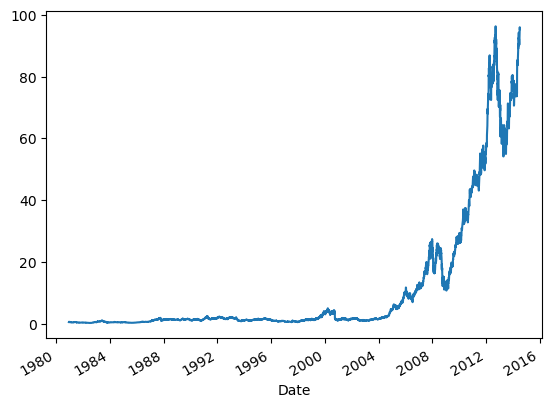

In [36]:
#your code
apple['Adj Close'].plot()
plt.show()